#### Imports

In [1]:
from package.package import *

def scale_data(train, test=''):    # Also adding scaling function.
    scaler = StandardScaler()

    train_data = scaler.fit_transform(train)
    
    if type(test) != str:
        test_data = scaler.transform(test)
        return train_data, test_data
    else:
        return train_data

,Unnamed: 0,Team,League,Year,OBP,SLG,BA,Playoffs,ERA,ERA+,FIP,HR,RBIs,Ks
0,1231,WSA,AL,1962,0.308,0.373,0.250,0,4.04,101,4.18,132,566,771
1,1230,STL,NL,1962,0.335,0.394,0.271,0,3.55,121,3.81,137,707,914
2,1229,SFG,NL,1962,0.341,0.441,0.278,1,3.79,101,3.81,204,807,886
3,1228,PIT,NL,1962,0.321,0.394,0.268,0,3.37,117,3.46,108,655,897
4,1227,PHI,NL,1962,0.330,0.390,0.260,0,4.28,91,4.13,142,658,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,WSN,NaN,2021,0.337,0.417,0.258,1,4.80,84,4.87,182,686,1346
1468,1468,PIT,NaN,2021,0.309,0.364,0.236,1,5.08,84,4.74,124,570,1312
1469,1469,TEX,NaN,2021,0.294,0.375,0.232,1,4.79,92,4.76,167,598,1239
1470,1470,BAL,NaN,2021,0.304,0.402,0.239,1,5.84,77,5.15,195,632,1234


### Prepare data for simulation

In [2]:
target = (dataset['Playoffs'])
data_moneyball = (dataset[['OBP', 'SLG', 'FIP']])    # chosing these stats because these are valued most.

display(target)
display(data_moneyball) 

# ---- VARIABLE DESCRIPTIONS ----
# OBP:          on-base percentage
# SLG:          slugging percentage
# Playoffs:     binary (if team made playoffs or not)
# FIP:          fielding independent pitching

target = target.to_numpy()
data_moneyball = data_moneyball.to_numpy()


0       0
1       0
2       1
3       0
4       0
       ..
1467    1
1468    1
1469    1
1470    1
1471    1
Name: Playoffs, Length: 1472, dtype: int64

,OBP,SLG,FIP
0,0.308,0.373,4.18
1,0.335,0.394,3.81
2,0.341,0.441,3.81
3,0.321,0.394,3.46
4,0.330,0.390,4.13
...,...,...,...
1467,0.337,0.417,4.87
1468,0.309,0.364,4.74
1469,0.294,0.375,4.76
1470,0.304,0.402,5.15


#### Split up data

X_train.shape: (1104, 3); y_train.shape: (1104,)
X_test.shape: (368, 3); y_test.shape: (368,)


Text(0.5, 0, 'FIP')

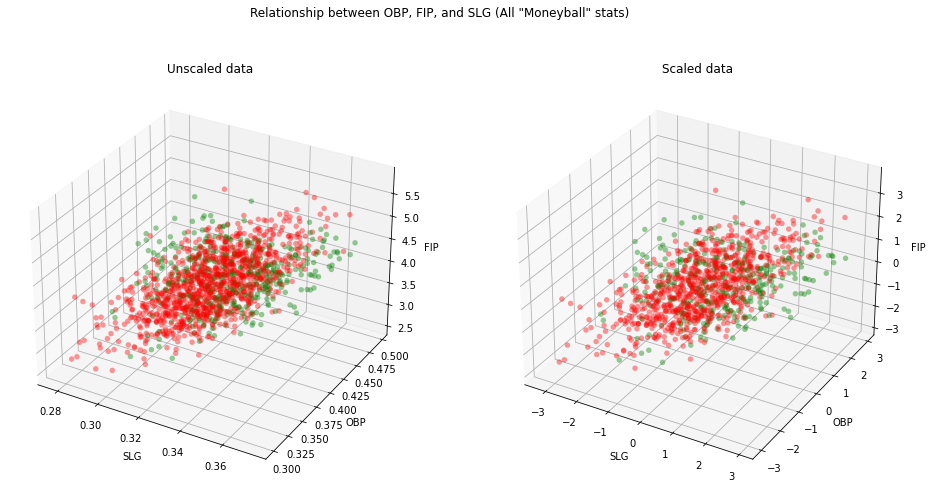

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_moneyball, target, stratify=target)

X_train, X_test = scale_data(X_train, X_test)
        

print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}; y_test.shape: {y_test.shape}')

# Plot the data
fig = plt.figure(figsize=(16, 8))
    
title = fig.suptitle(f'Relationship between OBP, FIP, and SLG (All "Moneyball" stats)')
axs_1 = fig.add_subplot(1, 2, 1, projection='3d')
axs_1.title.set_text('Unscaled data')

xs = data_moneyball[:, 0]    # SLG
ys = data_moneyball[:, 1]    # OBP
zs = data_moneyball[:, 2]    # FIP
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['green' if tar == 1 else 'red' for tar in target]

for data, color in zip(data_points, colors):
    x, y, z = data
    axs_1.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

axs_1.set_xlabel('SLG')
axs_1.set_ylabel('OBP')
axs_1.set_zlabel('FIP')

# Plot the scaled data.
axs_2 = fig.add_subplot(1, 2, 2, projection='3d')
axs_2.title.set_text('Scaled data')

xs = X_train[:, 0]    # SLG
ys = X_train[:, 1]    # OBP
zs = X_train[:, 2]    # FIP
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['green' if tar == 1 else 'red' for tar in y_train]

for data, color in zip(data_points, colors):
    x, y, z = data
    axs_2.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

axs_2.set_xlabel('SLG')
axs_2.set_ylabel('OBP')
axs_2.set_zlabel('FIP')


#### Create model

In [4]:
moneyball_model = LogisticRegression()
moneyball_model.fit(X_train, y_train)

print(f'Training Accuracy: {moneyball_model.score(X_train, y_train)*100:.2f}%')
print(f'Testing Accuracy: {moneyball_model.score(X_test, y_test)*100:.2f}%')


Training Accuracy: 70.47%
Testing Accuracy: 69.02%


#### Test model for different eras

In [5]:
def time_period_test(year, symbol):
    if symbol == '<':
        dataset_time_period = dataset.loc[dataset['Year'] < year]
    elif symbol == '>':
        dataset_time_period = dataset.loc[dataset['Year'] > year]
    else:
        print(f"Invalid symbol '{symbol}'")

    data_time_period = (dataset_time_period[['SLG', 'OBP', 'FIP']]).to_numpy()
    target_time_period = (dataset_time_period['Playoffs']).to_numpy()

    data_time_period = scale_data(data_time_period)

    X_train, X_test, y_train, y_test = train_test_split(data_time_period, target_time_period)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    accuracy_train = model.score(X_train, y_train)*100
    accuracy_test = model.score(X_test, y_test)*100

    fig = plt.figure(figsize=(10, 8))
    
    title = fig.suptitle(f'Statistics from {symbol} {year}\n Train accuracy: {accuracy_train:.1f}% \n Test accuracy: {accuracy_test:.1f}%')
    ax = fig.add_subplot(111, projection='3d')

    xs = data_time_period[:, 0]    # SLG
    ys = data_time_period[:, 1]    # OBP
    zs = data_time_period[:, 2]    # FIP
    data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
    colors = ['green' if tar == 1 else 'red' for tar in target_time_period]

    for data, color in zip(data_points, colors):
        x, y, z = data
        ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)
    
    ax.set_xlabel('SLG')
    ax.set_ylabel('OBP')
    ax.set_zlabel('FIP')


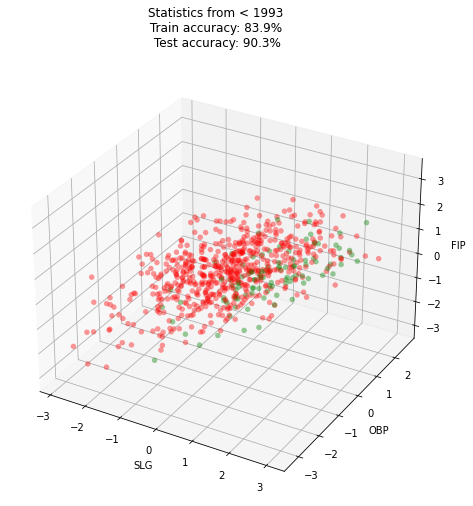

In [6]:
time_period_test(1993, '<')

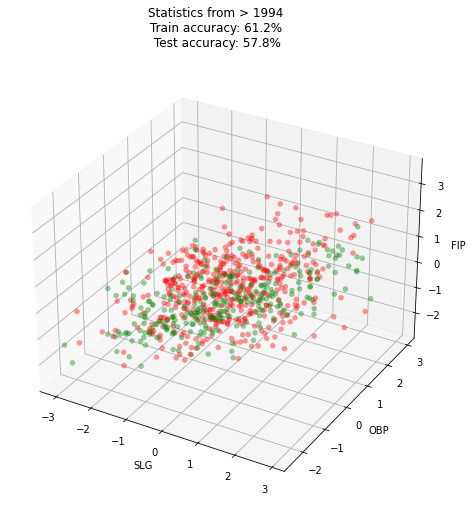

In [7]:
time_period_test(1994, '>')